# Point Processing - Tutorial 1
ARI2129 - Principles of Computer Vision for AI
Francesca Maria Mizzi - 118201L

## Exercise 1 - Splitting

The first step in creating the program is downloading all the necessary imports. In this case, only three were used: OpenCV(cv2), numpy and matplotlib.

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

The photo I chose to use for this assignment is the space.jpeg photo which I submitted along with this project. The photo is immediately read as a grayscale image since it will make future processes like bit plane slicing and power transforming much easier.

In [21]:
img = cv2.imread('space.jpeg',0)

The method I chose to use to split the photo into segments is by cropping the photo by the number of pixels. When modifying these four segments, they will always be in the order listed below: 
 - Top left corner
 - Top right corner
 - Bottom left corner
 - Bottom right corner

In [22]:
top_left = img[0:500, 0:500]

top_right = img[0:500, 500:1000]

bottom_left = img[500:1000, 0:500]

bottom_right = img[500:1000, 500:1000]

In [23]:
sections = [top_left, top_right, bottom_left, bottom_right]

I was uncertain which viewing method we were to use to display the four sections so I chose to present you with both. The first method is by looping through all four sections and printing them one-by-one.

In [24]:
for photo in sections:
    cv2.imshow("Space",photo)
    cv2.waitKey(0)

The other method I used to present the photos is by individually printing them thus having the ability to view them all at once.

In [25]:
cv2.imshow("Top Left", top_left)
cv2.imshow("Top Right", top_right)
cv2.imshow("Bottom Left", bottom_left)
cv2.imshow("Bottom Right", bottom_right)
cv2.waitKey(0)

-1

## Exercise 2 - Thresholding

In order to determine the brightness of a segment of the photo, I created a function which performs thresholding on the photo or video and determines whether the segment is light or dark.

To store to the values of the segments, I created 2 arrays which holds the conclusion of the function. For example, if the first segment, top left, is determined to be light, the value in index 0 of the img_brightness array will be "light".

In [26]:
img_brightness = []
vid_brightness = []

The code performs the following steps:
 - Once the image is submitted into the function, the binary threshold for each pixel is calculated using 127 as the benchmark. This is done by seeing if the pixel has a value less than or greater than 127. If less, it is assigned the value 0, if greater, it is assigned the value 255
 - A check is performed on each pixel. If the value is 0, it is a dark pixel so the counter for dark pixels is incremented. If the value is 255, it is a light pixel so the counter for light pixels is incremented. 
 - The counters for dark and light pixels are then compared. If it is found that the number of dark pixels is greater than that of light pixels, the segment is determined to be dark and "dark" is returned to the user. If the number of light pixels is greater than that of dark pixels, the segment is determined to be light and "light" is returned to the user.

In [27]:
def brightness(img):
    dark = 0
    light = 0
    retval,thresh1 = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)

    for row in thresh1:
        for pixel in row:
            if pixel == 0:
                dark+=1
            if pixel == 255:
                light+=1

    if dark > light:
        print("Section is dark")
        return "dark"
    else:
        print("Section is light")
        return "light"

As well as displaying to the user whether the section is light or dark, the result is also stored in the array list mentioned prior so that when later power law transformations are performed, it has already determined if the photo needs to be darkened or lightened.

It is also to be noted that as mentioned prior, all results are displayed in the following order
- Top left
- Top right
- Bottom left
- Bottom right

In [28]:
for photo in sections:
    img_brightness.append(brightness(photo))

Section is dark
Section is dark
Section is light
Section is dark


## Exercise 3 - Histogram

In order to generate the histogram for a specific photo or video, I used the calcHist() method from OpenCV in order to retrieve the appropriate data from the image. In order to make the presentation of the histograms more appealing, I used subplots to plot the graphs in a grid format in the position which they were originally segmented in.

A function was created to generate the histogram to make the code more reusable later on.

In [29]:
def gen_hist(img,position):
    hist = cv2.calcHist([img],[0],None,[255],[0,255])
    plt.subplot(2,2,position)
    plt.plot(hist)

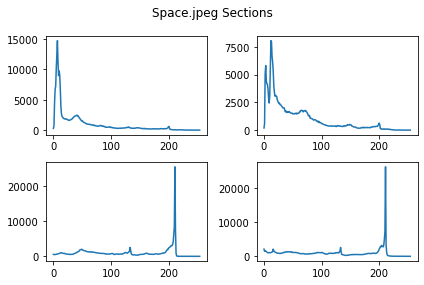

In [30]:
c=1
for photo in sections:
    gen_hist(photo, c)
    c+=1
    
plt.suptitle("Space.jpeg Sections")  
plt.tight_layout()
plt.show()

Since the original photo was split into 4 sections with the original focus being in the centre, in the above histograms one can easily see where the original focus of the photo is based on the spike in gray pixels.

## Exercise 4 - Power Transform

A function was created to perform the power tranformation on the segment. I chose to make gamma a variable when using the function as this makes it very easy to alter the adjustment on the photo.

In [31]:
def pow_trans(img,gamma):
    x = np.array(255*(img/255)**gamma,dtype='uint8')
    return x

By using the array list img_brightness which was filled earlier using the brightness() method, we have already determined whether the segment needs to be brightened or darkened. By comparing each photo to its corresponding index in the img_brightness array, we can determine the gamma to be applied to each photo in order to brighten or darken it. 

I chose to take 0.4 as the gamma when lightening the photo and 2.2 as the gamma when darkening the photo. These values obey the rule that when lightening a photo, there must be a gamma less then 1 and when darkening a photo, there must be a gamma greater than 1. 

In [32]:
c=0
fixed_photos = []

for photo in sections:
    if img_brightness[c] == "dark":
        fixed_photos.append(pow_trans(photo, 0.4))
    elif img_brightness[c] == "light":
        fixed_photos.append(pow_trans(photo, 2.2))
    c+=1
    
for photo in fixed_photos:
    cv2.imshow("Space Fixed",photo)
    cv2.waitKey(0)

As done prior, the gen_hist() function was utilized to generate the histograms for the modified segments. The histograms for the original segments were also generated to easily compare the results for the segments. 

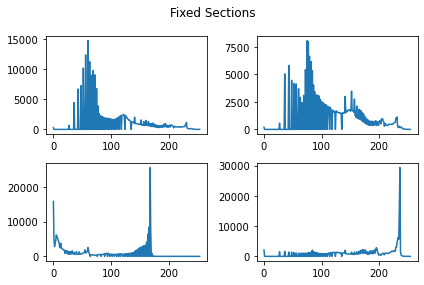

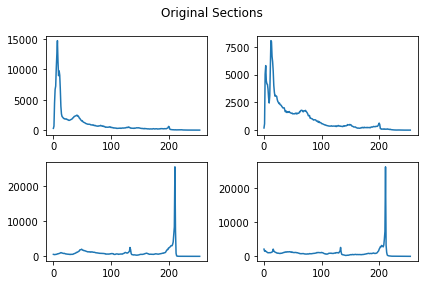

In [33]:
c=1
d=1
for photo in fixed_photos:
    gen_hist(photo,c)
    c+=1
    
plt.suptitle("Fixed Sections")
plt.tight_layout()
plt.show()

for photo in sections:
    gen_hist(photo, d)
    d+=1
    
plt.suptitle("Original Sections")    
plt.tight_layout()
plt.show()

## Exercise 5 - Bit Plane Slicing

In order to perform bit plan slicing on the image, I chose to slice it into an 8-bit image. Once each bit has been modified, the segment is then rebuilt form one image. 

In [34]:
sliced_photos = []
def bit_slice(img):
    
    lst = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
             lst.append(np.binary_repr(img[i][j] ,width=8))

    sliced_image = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1]) 
    sliced_photos.append(sliced_image)

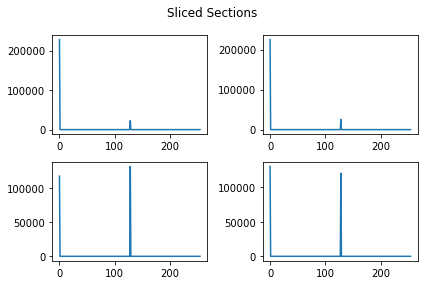

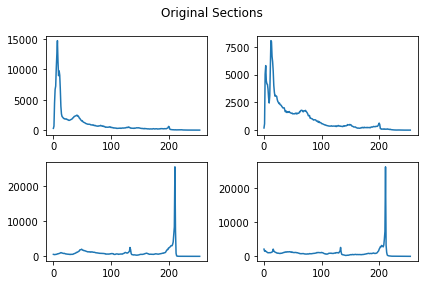

In [35]:
for image in sections:
    bit_slice(image)

for photo in sliced_photos:
    cv2.imshow("8-bit image",photo)
    cv2.waitKey(0)
c=1
d=1

for image in sliced_photos:
    gen_hist(image,c)
    c+=1
    
plt.suptitle("Sliced Sections")    
plt.tight_layout()
plt.show()

for photo in sections:
    gen_hist(photo, d)
    d+=1
    
plt.suptitle("Original Sections")    
plt.tight_layout()
plt.show()

As presented in the above histograms, after bit plane slicing, the pixel range is very monotonous. We can also see that in the top two sections, the graph has shifted to the right while in the bottom two sections, it has shifted to the left. 

## Exercise 6

The video I chose to use for the video implementation of the tutorial was a clip from the music video of "Bad Guy" by Billie Eilish. The original video was cropped to have a 10 second length since longer videos take longer to process. The frames per second of the video were reduced since it decreases the number of readings which need to be taken. 

In [36]:
vid = cv2.VideoCapture('bad_guy.mp4')
fps = vid.get(cv2.CAP_PROP_FPS)
print(fps)

ret,frame = vid.read()
count = 0
frames = 1

23.976023976023978


With every frame, a counter is incremented to keep count of the number of frames. I then chose to process every 8th frame to get a varied result. 

Firstly, I adjusted the size of the frame of the video while keeping the original ratio. I then converted the video to grayscale to facilitate later processes such as the power transformation. 

The video was then cropped into four equal sections as done prior and each section is stored into the array of sections.

To perform thresholding on the video, I utilized the brightness() method created earlier to determine which sections are dark and which are light. The result is then stored into an array to be utilized for future processes.

As done prior, I power transformed each individual section based on the result of the thresholding and brightened and darkened the photo appropriately.

The histograms for both the original frame as well as the brightened or darkened frame is then generated using the gen_hist() function created earlier.

Frame 1

Section is dark
Section is light
Section is dark
Section is dark


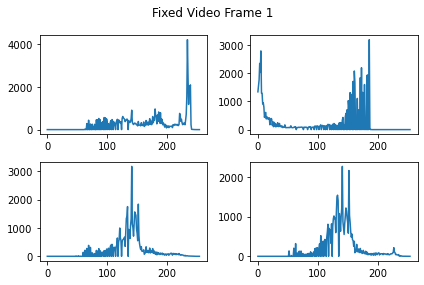

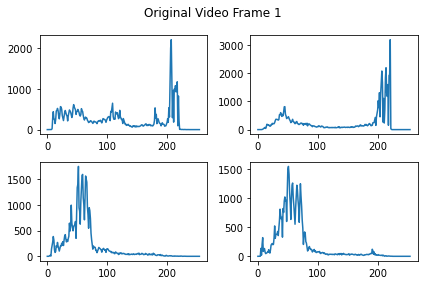

Frame 2

Section is light
Section is light
Section is dark
Section is dark


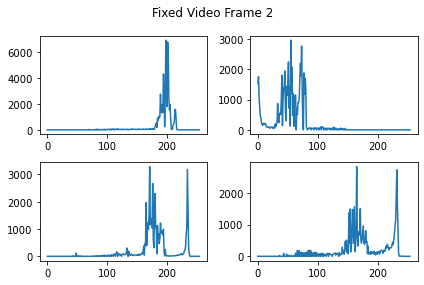

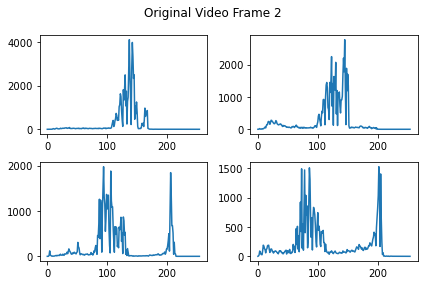

Frame 3

Section is light
Section is dark
Section is dark
Section is dark


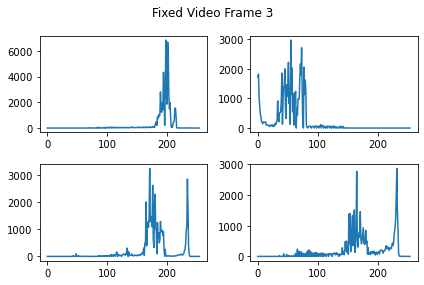

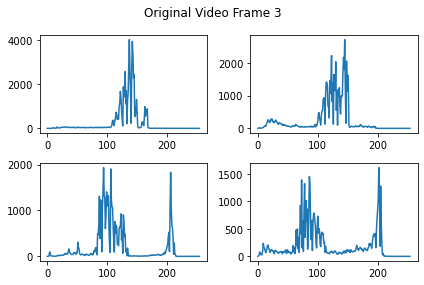

Frame 4

Section is light
Section is dark
Section is dark
Section is dark


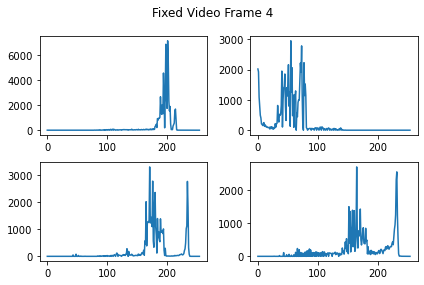

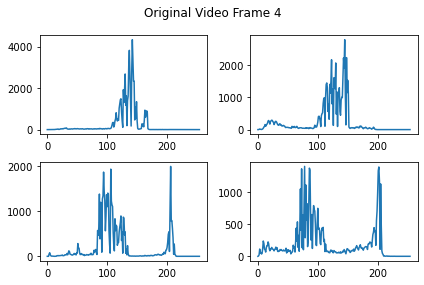

Frame 5

Section is light
Section is dark
Section is dark
Section is dark


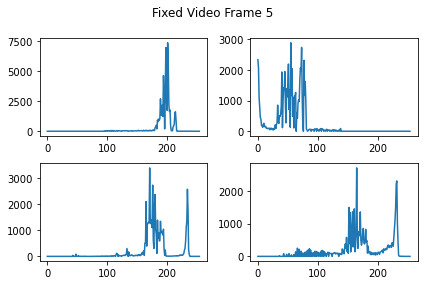

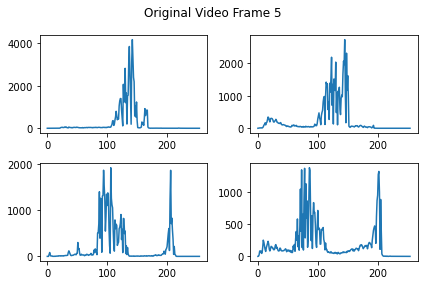

Frame 6

Section is light
Section is dark
Section is dark
Section is dark


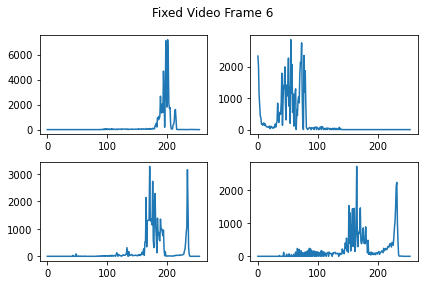

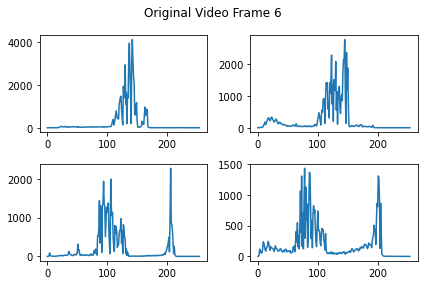

Frame 7

Section is light
Section is dark
Section is dark
Section is dark


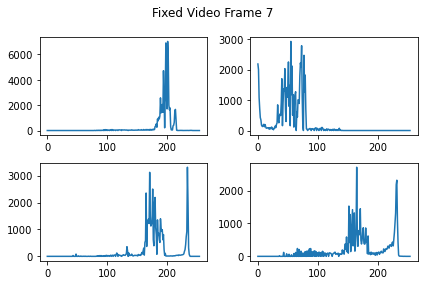

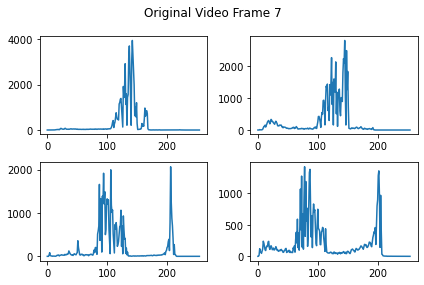

Frame 8

Section is light
Section is light
Section is dark
Section is dark


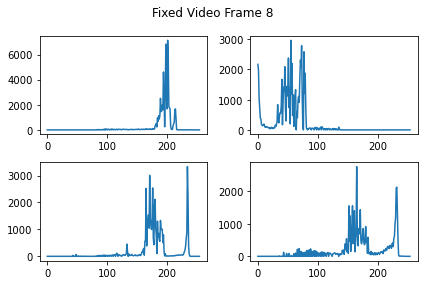

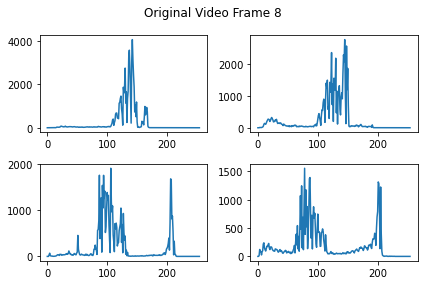

Frame 9

Section is light
Section is light
Section is dark
Section is dark


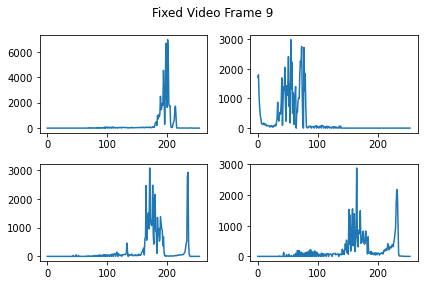

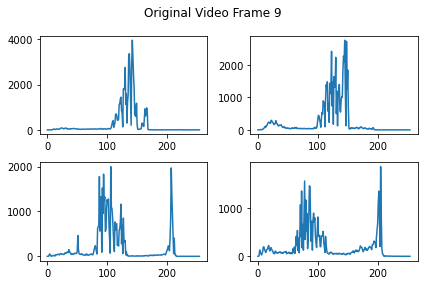

Frame 10

Section is light
Section is light
Section is dark
Section is dark


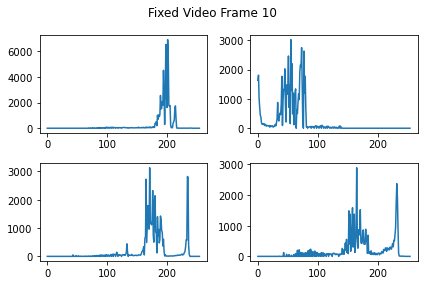

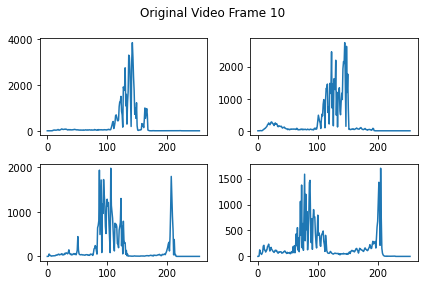

Frame 11

Section is light
Section is light
Section is dark
Section is dark


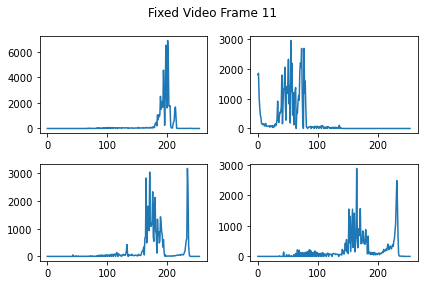

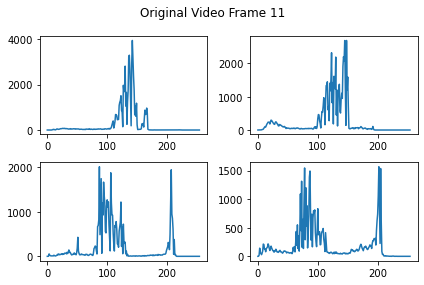

Frame 12

Section is light
Section is light
Section is dark
Section is dark


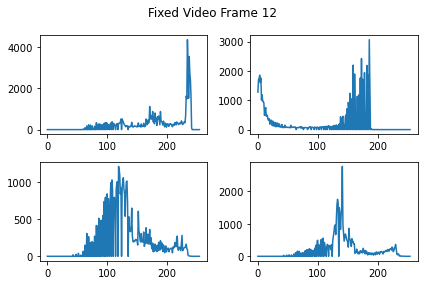

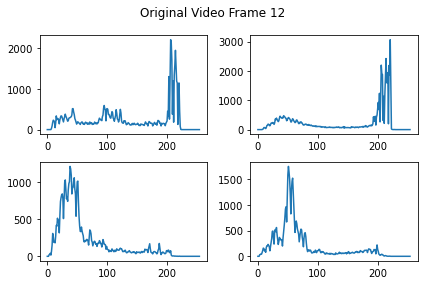

Frame 13

Section is light
Section is light
Section is dark
Section is dark


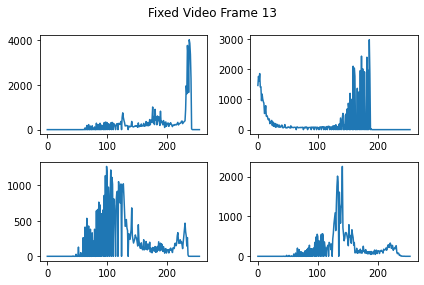

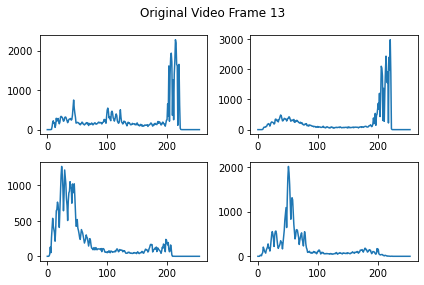

Frame 14

Section is light
Section is light
Section is dark
Section is dark


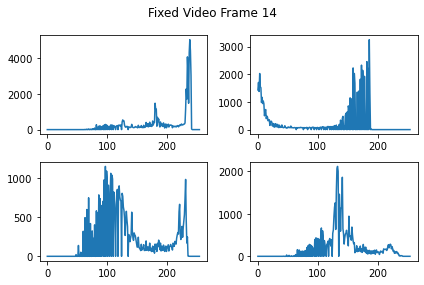

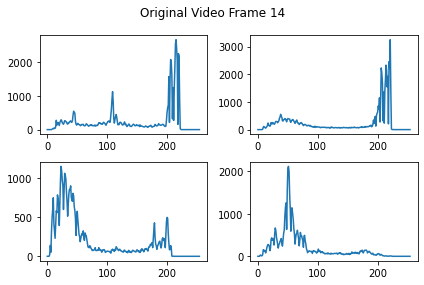

Frame 15

Section is light
Section is dark
Section is dark
Section is dark


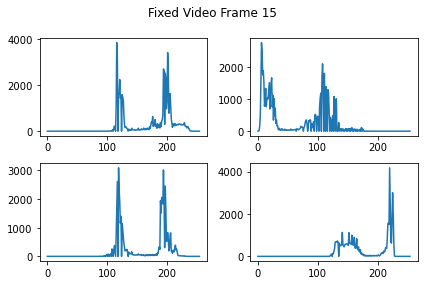

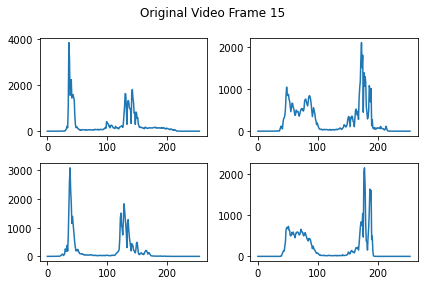

Frame 16

Section is dark
Section is dark
Section is dark
Section is dark


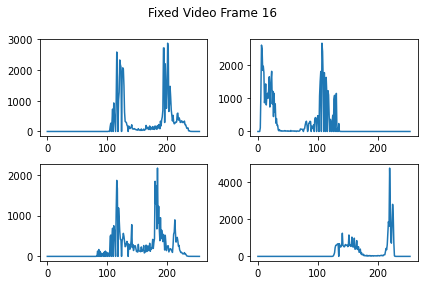

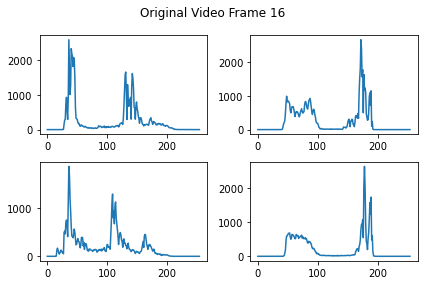

Frame 17

Section is light
Section is dark
Section is dark
Section is dark


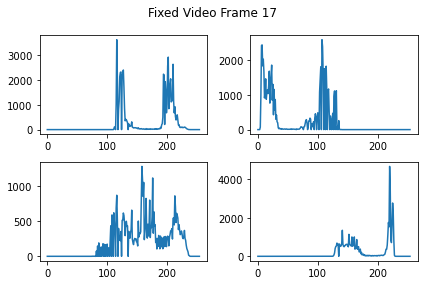

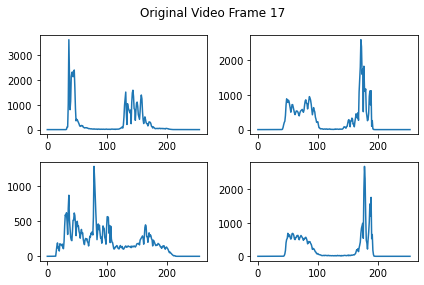

Frame 18

Section is dark
Section is dark
Section is dark
Section is light


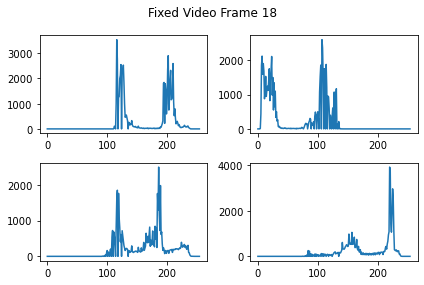

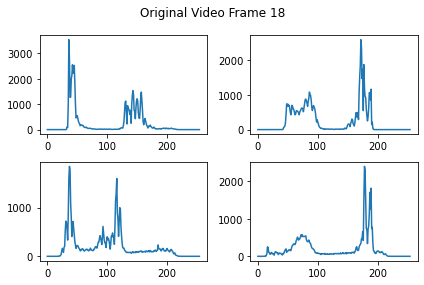

Frame 19

Section is dark
Section is dark
Section is dark
Section is dark


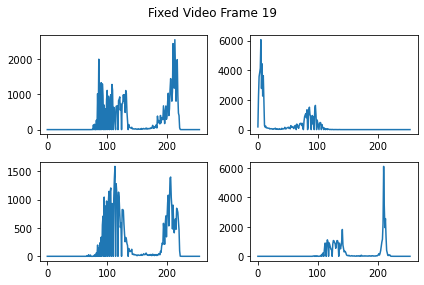

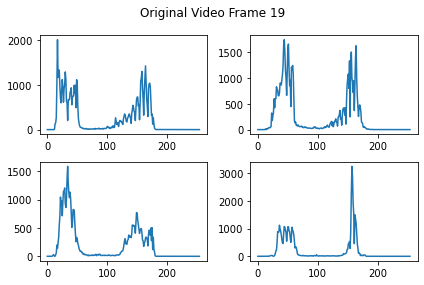

Frame 20

Section is dark
Section is dark
Section is dark
Section is dark


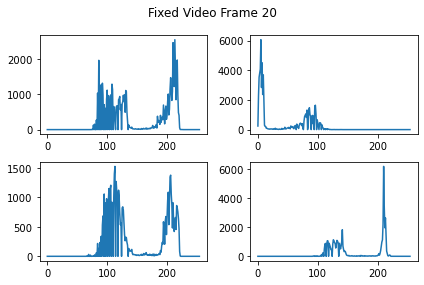

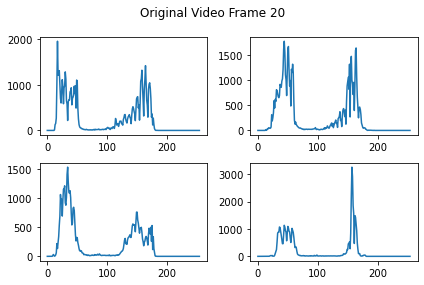

Frame 21

Section is dark
Section is dark
Section is dark
Section is dark


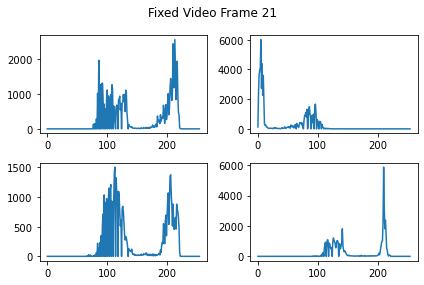

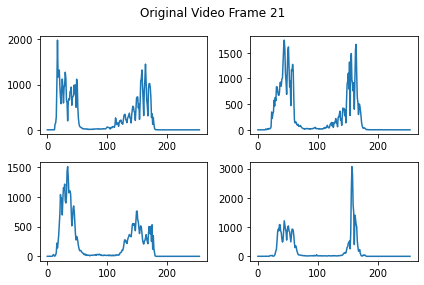

Frame 22

Section is dark
Section is dark
Section is dark
Section is dark


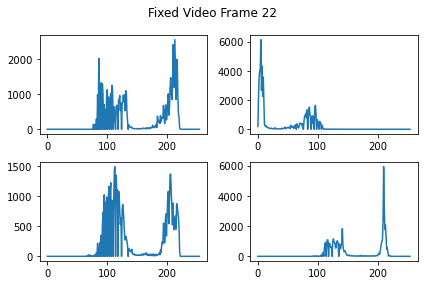

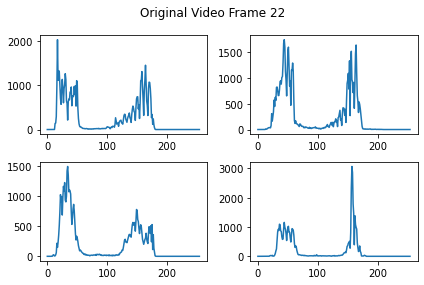

Frame 23

Section is dark
Section is dark
Section is dark
Section is dark


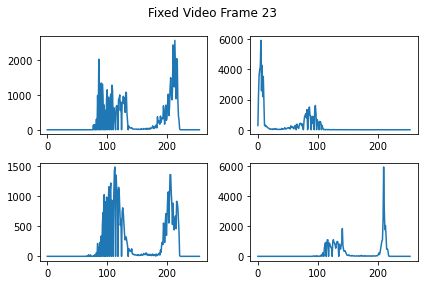

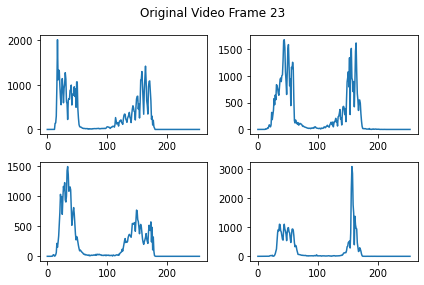

Frame 24

Section is dark
Section is dark
Section is dark
Section is dark


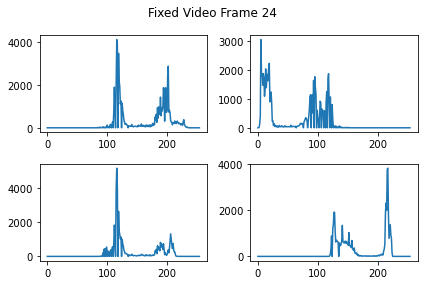

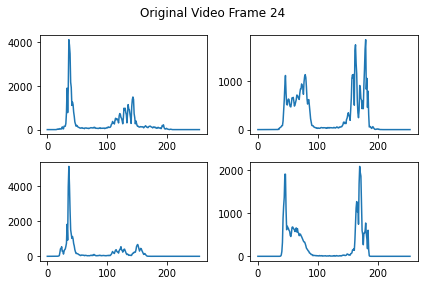

Frame 25

Section is dark
Section is dark
Section is dark
Section is dark


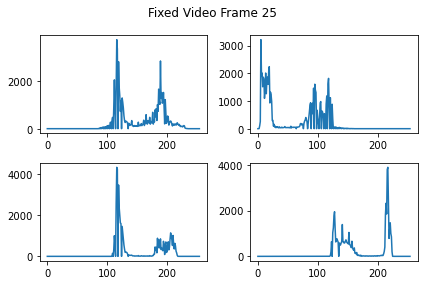

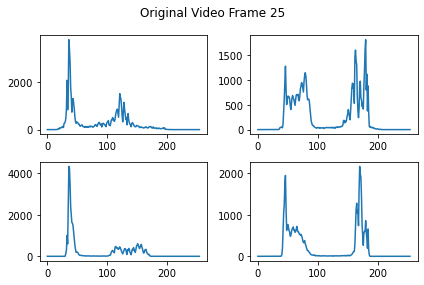

Frame 26

Section is dark
Section is dark
Section is light
Section is dark


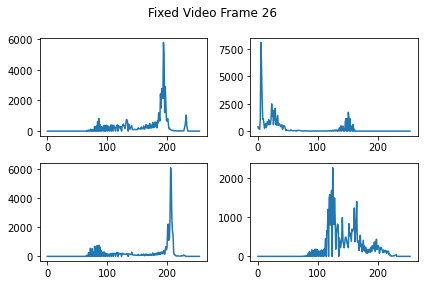

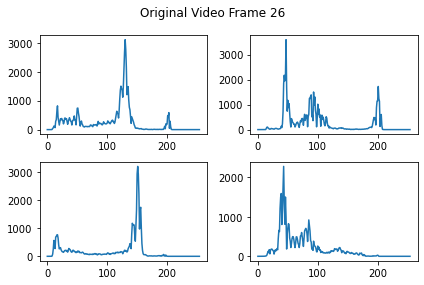

Frame 27

Section is dark
Section is dark
Section is light
Section is dark


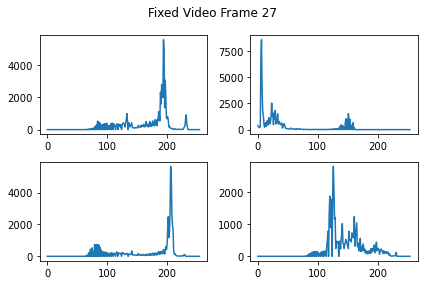

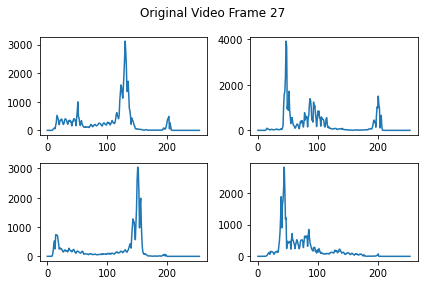

Frame 28

Section is dark
Section is dark
Section is light
Section is dark


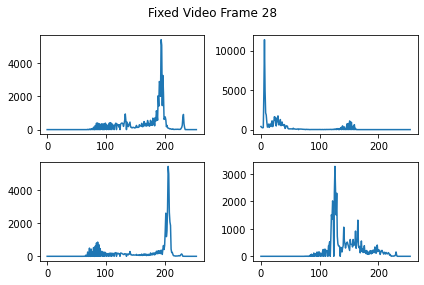

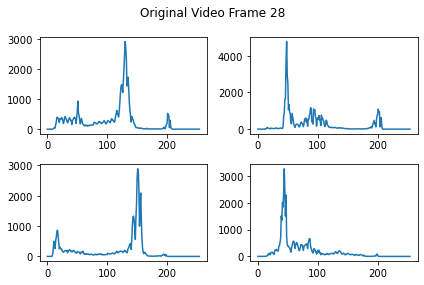

Frame 29

Section is dark
Section is dark
Section is light
Section is dark


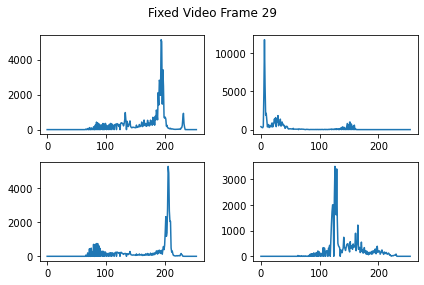

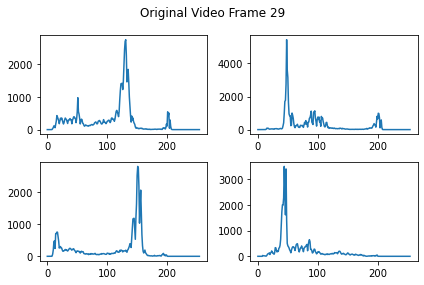

Frame 30

Section is dark
Section is light
Section is dark
Section is dark


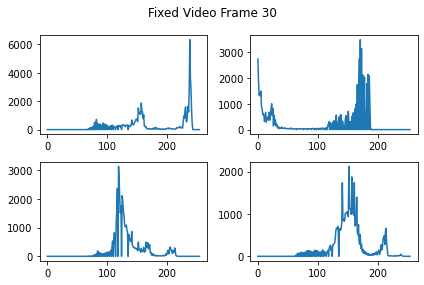

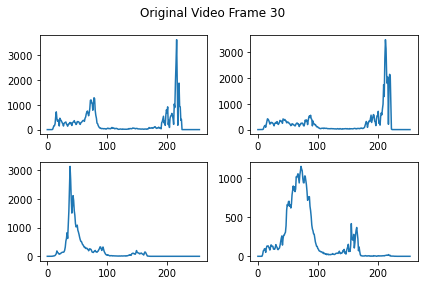

In [19]:
while ret:
    
    if count % 8 == 0:
        
        print("Frame "+str(frames))
        print()
        # converting and splitting video
        frame = cv2.resize(frame, (540, 480))
        grayvid = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        vtop_left = grayvid[0:270, 0:240]

        vtop_right = grayvid[0:270, 240:480]

        vbottom_left = grayvid[270:540, 0:240]

        vbottom_right = grayvid[270:540, 240:480]
        
        vsections = [vtop_left, vtop_right, vbottom_left, vbottom_right]
        
        cv2.imshow("Top Left", vtop_left)
        cv2.imshow("Top Right", vtop_right)
        cv2.imshow("Bottom Left", vbottom_left)
        cv2.imshow("Bottom Right", vbottom_right)

        # tresholding
        
        for video in vsections:
            vid_brightness.append(brightness(video))
        
        # power transform
        
        c=0
        fixed_videos = []

        for video in vsections:
            if vid_brightness[c] == "dark":
                fixed_videos.append(pow_trans(video, 0.4))
            elif vid_brightness[c] == "light":
                fixed_videos.append(pow_trans(video, 2.2))
            c+=1
            
        cv2.imshow("FIXED Top Left", fixed_videos[0])
        cv2.imshow("FIXED Top Right", fixed_videos[1])
        cv2.imshow("FIXED Bottom Left", fixed_videos[2])
        cv2.imshow("FIXED Bottom Right", fixed_videos[3])
        
        d=1
        e=1
        for video in fixed_videos:
            gen_hist(video, d)
            d+=1
            
        plt.suptitle("Fixed Video Frame "+ str(frames))    
        plt.tight_layout()
        plt.show()
        
        for video in vsections:
            gen_hist(video, e)
            e+=1
            
        plt.suptitle("Original Video Frame "+ str(frames))    
        plt.tight_layout()
        plt.show()
        
        frames+=1
        
    cv2.waitKey(int(1/fps*1000))
    count += 1
    ret, frame = vid.read()
        
vid.release()
cv2.destroyAllWindows()